In [22]:
from qiskit import *
from qiskit import IBMQ
from qiskit.tools.visualization import plot_bloch_multivector,plot_histogram


In [3]:
IBMQ.load_account()

E:\ANACONDA\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

## Quantum teleportation and Protocol
- How to build a quantum teleportation circuit?
- What is it? It is the transfer of quantum states from one qubit to another. It does not mean physically transfering the qubit from one place to another
- It means to <font color ='red'>transfer information from one qubit to another </font>

### Why is it required?
- Because the act of <font color = 'green'> copying a state </font> is not meaningful because while copying , you implicitly mean measuring the state and then transferring that information from point A to point B.

- This has a problem as measurement would <font color='red'>collapse</font> the state and thus copying is not possible without measurement.

In [44]:
circuit = QuantumCircuit(3,3) # 3 quantum bits and 3 classical bits 

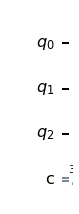

In [10]:
%matplotlib inline
circuit.draw(output='mpl')

## Goal 
- To transfer the information from <font color='red'>QUBIT 1</font> to <font color='red'>QUBIT 2</font> via <font color='red'>QUBIT 2</font>.
- First let us make Q0 to |1> and then transfer that to Q2

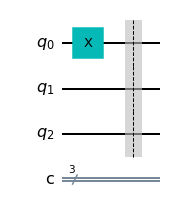

In [45]:
# STEP 1
circuit.x(0)
circuit.barrier()
circuit.draw(output='mpl')

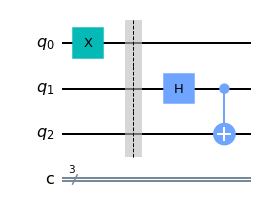

In [46]:
# STEP 2 - create an entanglement between 1 and 2
circuit.h(1)
circuit.cx(1,2)
circuit.draw(output='mpl')


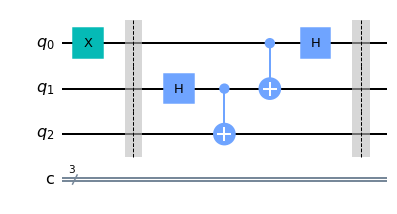

In [47]:
# Step 3 - controlled x from 0 to 1 and hadamard on 0 
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.draw(output='mpl')

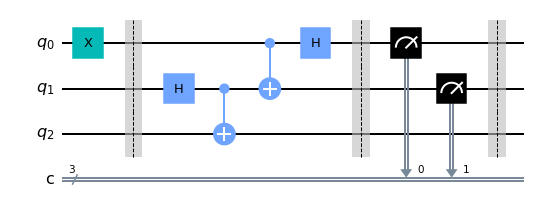

In [48]:
# Step 4 - measurement -> first 0 and then 1 
circuit.measure([0,1],[0,1])
circuit.barrier()
circuit.draw(output='mpl')

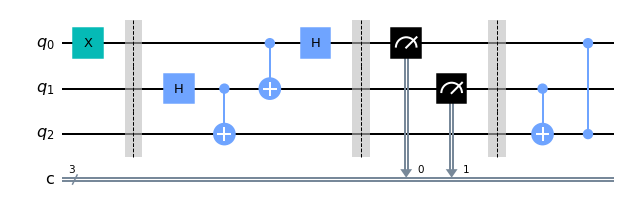

In [49]:
# step 5 - CX from 1 -> 2 and CZ from 0-> 2
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

### Final histograms
- Reading the outcomes is like - 
    - 100 : 1 is for C2 , 0 is for C1 and 0 is for C0 
    - 101 : 1 is for C2 , 0 is for C1 and 1 is for C0 
- Means you read out to in as -
    $C _{i} , C _{i-1} , ... C _{1} and C _{0}$ for the state of i bits $b_{i}b_{i-1}...b_{1}b_{0}$

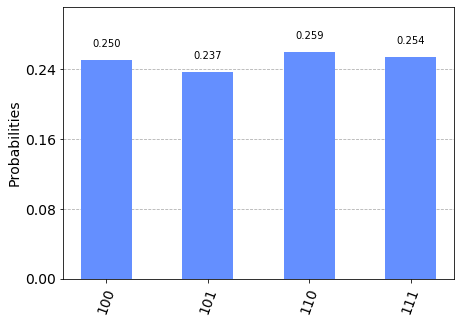

In [50]:
circuit.measure([2],[2]) # measuring the qubit 2 and saving in classical register 2 
simulator = Aer.get_backend(name='qasm_simulator')
result = execute(circuit,backend=simulator,shots=1000).result()
#SV = result.get_statevector()
counts = result.get_counts()
plot_histogram(counts)

## We have teleportation. 
## I repeat, we have teleportation!